# Wrangling and Analyzing WeRateDogs Twitter Archive

## Packages

The following packages (libraries) need to be installed. You can install these packages via conda or pip. Please revisit our Anaconda tutorial earlier in the Nanodegree program for package installation instructions.
* pandas
* NumPy
* requests
* tweepy
* json

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy 
import json
#Adding more libraries for plotting
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
#Suppress annoying messages
import warnings
#warnings.filterwarnings('ignore')

## Gather

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
#Set index to tweet_id as it is appears to be the data's primary key
twitter_archive.set_index('tweet_id', inplace = True)

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
#Save response with the same filename as in the URL
#https://stackoverflow.com/questions/18727347/how-to-extract-a-filename-from-a-url-append-a-word-to-it
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [4]:
twitter_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
#Set index to tweet_id as it is appears to be the data's primary key
twitter_image_predictions.set_index('tweet_id', inplace = True)

3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

twitter_api.py: This is the Twitter API code to gather some of the required data for the project. Read the code and comments, understand how the code works, then copy and paste it into your notebook.

In [5]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer
#
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'
#
#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#
#api = tweepy.API(auth, wait_on_rate_limit=True)
#
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)
#
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
#    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

tweet_json.txt: This is the resulting data from twitter_api.py. You can proceed with the following part of "Gathering Data for this Project" on the Project Details page: "Then read this tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count."

In [6]:
twitter_counts = pd.read_json('tweet-json.txt', lines=True)
twitter_counts.set_index('id', inplace = True)
twitter_counts.index.rename('tweet_id', inplace=True)
twitter_counts = twitter_counts[['retweet_count', 'favorite_count']]

## Assess

You can assess data for:
* Quality: issues with content. Low quality data is also known as dirty data.
* Tidiness: issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements:
 1. Each variable forms a column.
 2. Each observation forms a row.
 3. Each type of observational unit forms a table.

...using two types of assessment:
* Visual assessment: scrolling through the data in your preferred software application (Google Sheets, Excel, a text editor, etc.).
* Programmatic assessment: using code to view specific portions and summaries of the data (pandas' head, tail, and info methods, for example).

https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html

The six core data quality dimensions are (https://strategicdb.com/2017/10/27/six-dimensions-to-data-quality):
* Completeness
* Uniqueness
* Timeliness
* Validity
* Accuracy
* Consistency

## Quality Checks

### Visual Inspection

In [7]:
twitter_archive.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_image_predictions.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
twitter_counts.head()

,retweet_count,favorite_count
tweet_id,,
892420643555336193,8853,39467
892177421306343426,6514,33819
891815181378084864,4328,25461
891689557279858688,8964,42908
891327558926688256,9774,41048


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

In [11]:
twitter_archive.expanded_urls.isnull().sum()

59

* **Quality Issue [Visual Inspection]**: There are 59 NULL values in expanded_urls. We need this for joining to our prediction file.

### Completeness
 * Check length of each of the three datasets.

In [12]:
twitter_image_predictions.index.isin(twitter_archive.index).sum(), \
twitter_image_predictions.index.isin(twitter_counts.index).sum(), \
twitter_archive.index.isin(twitter_counts.index).sum()

(2075, 2073, 2354)

> * It appears that twitter_image_predictions contains a subset of the data in twitter_archive & twitter_counts.
> * We should check to see if all records of twitter_image_predictions is contained in the other two datasets.

**Quality Issue [Completeness]**: From the completeness analysis, we will only be able to join all three datasets on 2073 tweet_ids.
 

### Uniqueness

* Check for duplicated tweet_ids.

In [13]:
twitter_archive.index.duplicated().sum(), \
twitter_image_predictions.index.duplicated().sum(), \
twitter_counts.index.duplicated().sum()

(0, 0, 0)

> * No duplicatd tweet_ids in any datasets.

In [14]:
twitter_image_predictions.jpg_url.duplicated().sum()

66

**Quality Issue [Uniqueness]**: From the uniqueness analysis, 66 of the images in twitter_image_predictions are duplicated.


### Timeliness

 * Check that datetime is stored as the right data type.

In [15]:
twitter_archive.timestamp.dtype, \
twitter_archive.retweeted_status_timestamp.dtype

(dtype('O'), dtype('O'))

**Quality Issue [Timeliness]**: timestamp is stored as object instead of datetime.

**Quality Issue [Timeliness]**: retweeted_status_timestamp is stored as object instead of datetime.

### Validity

 * Check if denominator is 0 for any values.

In [16]:
len(twitter_archive[twitter_archive.rating_denominator == 0])

1

In [17]:
twitter_archive[twitter_archive.rating_denominator == 0]

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


**Quality Issue [Validity]**: There is one tweet with a denominator of '0'.

 * We only want original tweets, check if data contains any retweets.

In [18]:
twitter_archive.retweeted_status_id.notnull().sum()

181

**Quality Issue [Validity]**: There are 181 tweets that are retweets.

 * Visually inspect top 10 data value_counts

In [19]:
twitter_archive.source.value_counts().head(10)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

>* No issues with source, but appearance could be cleaned up to remove HTML tags.

In [20]:
twitter_archive.text.value_counts().head(10)

Happy New Year from the squad! 13/10 for all https://t.co/9njRxyUd5L                                                                                                    1
"Fuck the system" 10/10 https://t.co/N0OADmCnVV                                                                                                                         1
This is Mary. She's desperately trying to recreate her Coachella experience.   12/10 downright h*ckin adorable https://t.co/BAJrfPvtux                                  1
This is Phil. He's a father. A very good father too. 13/10 everybody loves Phil https://t.co/9p6ECXJMMu                                                                 1
This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k                            1
Seriously, add us 🐶 11/10 for sad wet pupper https://t.co/xwPE9faVZR                                                                                  

>* No issues with text

In [21]:
len(twitter_image_predictions[twitter_image_predictions.jpg_url.duplicated()])

66

**Quality Issue [Validity]**: Duplicate data, there are 66 instances of the same photo(s) being predicted.

In [22]:
#twitter_archive[twitter_archive.expanded_urls.str.contains(',', na=False)]
twitter_archive.expanded_urls.str.contains(',', na=False).sum()

639

>* There are 639 instances of more than one URL (picture) in the URL field.

In [23]:
twitter_archive.name.value_counts().head(10)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Lola        10
Tucker      10
Penny       10
Winston      9
Name: name, dtype: int64

In [24]:
twitter_archive.name[twitter_archive.name.str.islower()].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

**Quality Issue 8 [Validity]**: Instances of invalid dog names (see above for examples).

In [25]:
twitter_archive.doggo.value_counts().head(10)

None     2259
doggo      97
Name: doggo, dtype: int64

In [26]:
twitter_archive.floofer.value_counts().head(10)

None       2346
floofer      10
Name: floofer, dtype: int64

In [27]:
twitter_archive.pupper.value_counts().head(10)

None      2099
pupper     257
Name: pupper, dtype: int64

In [28]:
twitter_archive.puppo.value_counts().head(10)

None     2326
puppo      30
Name: puppo, dtype: int64

**Quality Issue 9 [Validity]**: Dog "stage" has string 'None' instead of NULL (doggo, floofer, pupper, puppo).

## Tidiness Checks

In [29]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

**Tidiness Issue 1**: The dog 'stages' should be one column with values of 'None', 'doggo', 'floofer', 'pupper', 'puppo'.

**Tidiness Issue 2**: Remove replies and retweets, we only want original tweets.

In [30]:
twitter_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 232.0+ KB


**Tidiness Issue 3**: Three predictions is excessive and not useful for this project. Remove P2 and P3.

## Clean

### Define

**Data Quality Issues**
1.	There are 59 NULL values in expanded_urls.
2.	Timestamp is stored as object instead of datetime.
3.	There is one tweet with a denominator value of '0'.
4.	There are 181 tweets that are retweets.
5.	There are 78 tweets that are replies.
6.	Duplicate data, there are 66 instances of the same photo(s) being predicted..
7.	Instances of invalid dog names (‘None’ and lowercase words).
8.	Dog "stage" has string value of 'None' instead of NULL for the respective columns (‘doggo’, ‘floofer’, ‘pupper’, ‘puppo’).
9.  The 'source' column should be in a cleaner format.

**Tidiness Issues**
1. The dog 'stages' should be one column with values of 'None', 'doggo', 'floofer', 'pupper', 'puppo'.
2. Remove replies and retweets, we only want original tweets.
3. Three predictions are excessive and not useful for this project. Remove P2 and P3.
4. Combine the three dataframes into one for easier analysis.

#### Code

* Copy original pieces of data prior to cleaning. 

In [31]:
twitter_archive_clean = twitter_archive.copy()
twitter_image_predictions_clean = twitter_image_predictions.copy()
twitter_counts_clean = twitter_counts.copy()

### 1. Remove 59 NULL values in expanded_urls.

#### Code

In [32]:
twitter_archive_clean.expanded_urls.isnull().sum()

59

In [33]:
twitter_archive_clean.dropna(subset=['expanded_urls'], inplace=True)

#### Test

In [34]:
assert twitter_archive_clean.expanded_urls.isnull().sum() == 0

### 2.	Change Timestamp to datetime.

#### Code

In [35]:
#https://stackoverflow.com/questions/32034689/why-is-pandas-to-datetime-slow-for-non-standard-time-format-such-as-2014-12-31/32034914#32034914
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp, infer_datetime_format=True)

#### Test

In [36]:
twitter_archive_clean.timestamp.dtype

dtype('<M8[ns]')

### 3.	Remove tweet with a denominator value of '0'.
 * This is actually a 'reply tweet' and will be removed in the step below.

### 4 & 5. Remove Replies and Retweets
1. Retain records where:
 * in_reply_to_status_id IS NULL or
 * retweeted_status_id IS NULL
2. Drop reply and retween columns
3. Expected result is 2097 (Remove 78 Replies & 181 retweets).

#### Code

In [37]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean.drop(['in_reply_to_status_id',
                    'in_reply_to_user_id',
                    'retweeted_status_id',
                    'retweeted_status_user_id',
                    'retweeted_status_timestamp'], 
                   inplace = True, axis = 1)

#### Test

In [38]:
len(twitter_archive_clean)

2094

### 6.	Duplicate data, remove 66 duplicate image predictions.

#### Code

In [39]:
len(twitter_image_predictions_clean)

2075

In [40]:
twitter_image_predictions_clean.drop_duplicates(subset=['jpg_url'], inplace=True)

#### Test

In [41]:
assert twitter_image_predictions_clean.duplicated().sum() == 0

In [42]:
len(twitter_image_predictions_clean)

2009

### 7. Remove invalid dog names.

#### Code

In [43]:
(twitter_archive_clean.name.str.strip() == 'None').sum(), \
(twitter_archive_clean.name.str.strip() == 'a').sum()

(600, 55)

In [44]:
#https://stackoverflow.com/questions/50633935/pandas-replace-all-strings-in-lowercase-in-a-column-with-none
#https://stackoverflow.com/questions/17534106/what-is-the-difference-between-nan-and-none
#df.loc[df['names'] == df['names'].str.lower(), 'names'] = np.nan

twitter_archive_clean.loc[twitter_archive_clean.name.str.strip() == twitter_archive_clean.name.str.lower(), 'name'] = np.nan
twitter_archive_clean.loc[twitter_archive_clean.name.str.strip() == 'None', 'name'] = np.nan

#### Test

In [45]:
assert (twitter_archive_clean.name.str.strip() == 'None').sum() == 0
assert (twitter_archive_clean.name.str.strip() == 'a').sum() == 0

### 8.	Replace 'None' with NaN for columns (‘doggo’, ‘floofer’, ‘pupper’, ‘puppo’)

#### Code

In [46]:
(twitter_archive_clean.doggo.str.strip() == 'None').sum(), \
(twitter_archive_clean.floofer.str.strip() == 'None').sum(), \
(twitter_archive_clean.pupper.str.strip() == 'None').sum(), \
(twitter_archive_clean.puppo.str.strip() == 'None').sum(),

(2011, 2084, 1865, 2070)

In [47]:
twitter_archive_clean.loc[twitter_archive_clean.doggo.str.strip() == 'None', 'doggo'] = np.nan
twitter_archive_clean.loc[twitter_archive_clean.floofer.str.strip() == 'None', 'floofer'] = np.nan
twitter_archive_clean.loc[twitter_archive_clean.pupper.str.strip() == 'None', 'pupper'] = np.nan
twitter_archive_clean.loc[twitter_archive_clean.puppo.str.strip() == 'None', 'puppo'] = np.nan

#### Test

In [48]:
assert (twitter_archive_clean.doggo.str.strip() == 'None').sum() == 0
assert (twitter_archive_clean.floofer.str.strip() == 'None').sum() == 0
assert (twitter_archive_clean.pupper.str.strip() == 'None').sum() == 0
assert (twitter_archive_clean.puppo.str.strip() == 'None').sum() == 0

### 9.	Create dog_stage column by combining then dropping 'doggo', 'floofer', 'pupper', and 'puppo' columns

#### Code

In [49]:
#https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas/33098470
twitter_archive_clean['dog_stage'] = twitter_archive_clean[twitter_archive_clean.columns[-4:]].apply(lambda x: '-'.join(x.dropna().astype(str)), axis=1)
twitter_archive_clean.dog_stage.replace('', 'unknown', inplace=True)

In [50]:
twitter_archive_clean.drop(['doggo',
                            'floofer',
                            'pupper',
                            'puppo'],
                           inplace = True, axis = 1)

#### Test

In [51]:
twitter_archive_clean.dog_stage.unique()

array(['unknown', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo-puppo',
       'doggo-floofer', 'doggo-pupper'], dtype=object)

In [52]:
twitter_archive_clean.head(2)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
tweet_id,,,,,,,,
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,unknown
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,unknown


### 11.	Clean up the 'source' column.

#### Code

In [53]:
list(twitter_archive_clean.source.unique())

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

In [54]:
source_old = list(twitter_archive_clean.source.unique())
source_new = ['iPhone', 'Web Client', 'Vine', 'TweetDeck']
twitter_archive_clean.source.replace(source_old,
                                     source_new,
                                     inplace = True)

#### Test

In [55]:
for source in list(twitter_archive_clean.source.unique()):
    assert source not in source_old

### 12. Combine numerator and denominator columns.

#### Code

In [56]:
twitter_archive_clean['rating'] = twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator
twitter_archive_clean.drop(['rating_numerator',
                            'rating_denominator'],
                            inplace = True, axis = 1)

#### Test

In [57]:
twitter_archive_clean.head(2)

,timestamp,source,text,expanded_urls,name,dog_stage,rating
tweet_id,,,,,,,
892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,unknown,1.3
892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,unknown,1.3


### 13a. NEW CODE: after further analysis (details below).
 * This was added after performing further analasis of the data.
 * There are cases where p1_dog is FALSE, but p2_dog or p3_dog is TRUE.
 * Since this is the "We Rate Dogs", I will make an assumption that most, if not all, submitted pictures are of a dog.
 * With the above said, I have added the below code to combine p1, p2, and p3, instead of dropping p2 and p3 as originally planned.

#### Code

In [58]:
len(twitter_image_predictions_clean[(twitter_image_predictions_clean.p1_dog == False) & (twitter_image_predictions_clean.p2_dog == True)]), \
len(twitter_image_predictions_clean[(twitter_image_predictions_clean.p1_dog == False) & (twitter_image_predictions_clean.p2_dog == False) & (twitter_image_predictions_clean.p3_dog == True)])

(149, 62)

In [59]:
#https://stackoverflow.com/questions/47969756/pandas-apply-function-that-returns-two-new-columns
def dog_prediction(row):
    if row.p1_dog == True:
        return pd.Series([row.p1, row.p1_conf, row.p1_dog])
    elif row.p2_dog == True:
        return pd.Series([row.p2, row.p2_conf, row.p2_dog])
    elif row.p3_dog == True:
        return pd.Series([row.p3, row.p3_conf, row.p3_dog])
    else:
        return pd.Series([row.p1, row.p1_conf, row.p1_dog])

twitter_image_predictions_clean[['p1', 'p1_conf', 'p1_dog']] = twitter_image_predictions_clean.apply(dog_prediction, axis=1)

#### Test

In [60]:
assert len(twitter_image_predictions_clean[(twitter_image_predictions_clean.p1_dog == False) & (twitter_image_predictions_clean.p2_dog == True)]) == 0
assert len(twitter_image_predictions_clean[(twitter_image_predictions_clean.p1_dog == False) & (twitter_image_predictions_clean.p2_dog == False) & (twitter_image_predictions_clean.p3_dog == True)]) == 0

### 13b. Combine the three dataframes for analysis, only keep relevant columns for testing. 

#### Code

In [61]:
twitter_image_predictions_clean.index.isin(twitter_archive_clean.index).sum(), \
twitter_image_predictions_clean.index.isin(twitter_counts_clean.index).sum(), \
twitter_archive_clean.index.isin(twitter_counts_clean.index).sum()

(1971, 2008, 2094)

In [62]:
twitter_archive_master = twitter_archive_clean.join(twitter_counts_clean, how='inner').join(twitter_image_predictions_clean, how='inner')
twitter_archive_master.drop(['text',
                        'expanded_urls',
                        'jpg_url',
                        'p2',
                        'p2_conf',
                        'p2_dog',
                        'p3',
                        'p3_conf',
                        'p3_dog'],
                       inplace = True, axis = 1)

#### Test
* Expected count of inner join between the three dataframes is 1971 (smallest count).

In [63]:
assert len(twitter_archive_master) == 1971

In [64]:
twitter_archive_master.head(2)

,timestamp,source,name,dog_stage,rating,retweet_count,favorite_count,img_num,p1,p1_conf,p1_dog
tweet_id,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,iPhone,Phineas,unknown,1.3,8853,39467,1,orange,0.097049,False
892177421306343426,2017-08-01 00:17:27,iPhone,Tilly,unknown,1.3,6514,33819,1,Chihuahua,0.323581,True


In [65]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 892420643555336193 to 666020888022790149
Data columns (total 11 columns):
timestamp         1971 non-null datetime64[ns]
source            1971 non-null object
name              1349 non-null object
dog_stage         1971 non-null object
rating            1971 non-null float64
retweet_count     1971 non-null int64
favorite_count    1971 non-null int64
img_num           1971 non-null int64
p1                1971 non-null object
p1_conf           1971 non-null float64
p1_dog            1971 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 171.3+ KB


### 14.	Replace NaN with 'unknown' for the name column as NaN requires special query functions.

#### Code

In [66]:
twitter_archive_master.name.replace(np.nan, 'unknown', inplace=True)

#### Test

In [67]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 892420643555336193 to 666020888022790149
Data columns (total 11 columns):
timestamp         1971 non-null datetime64[ns]
source            1971 non-null object
name              1971 non-null object
dog_stage         1971 non-null object
rating            1971 non-null float64
retweet_count     1971 non-null int64
favorite_count    1971 non-null int64
img_num           1971 non-null int64
p1                1971 non-null object
p1_conf           1971 non-null float64
p1_dog            1971 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 171.3+ KB


## Store

#### Code

In [68]:
twitter_archive_master.to_csv('twitter_archive_master.csv', header=True, index=True)
#twitter_archive_clean.to_csv('twitter_archive_clean.csv', header=True, index=True)
#twitter_counts_clean.to_csv('twitter_counts_clean.csv', header=True, index=True)
#twitter_image_predictions_clean.to_csv('twitter_image_predictions_clean.csv', header=True, index=True)

#### Test

In [69]:
!ls -lth

total 13M
-rw-r--r-- 1 root root 203K Feb 10 05:34 twitter_archive_master.csv
-rw-r--r-- 1 root root 328K Feb 10 05:34 image-predictions.tsv
-rw-r--r-- 1 root root 506K Feb 10 05:34 wrangle_act.ipynb
-rw-r--r-- 1 root root  54K Feb  9 22:30 wrangle_report.pdf
-rw-r--r-- 1 root root 850K Feb  9 22:29 act_report.pdf
-rw-r--r-- 1 root root  11M Jan 22 23:21 tweet-json.txt
-rw-r--r-- 1 root root 895K Jan 22 23:20 twitter-archive-enhanced.csv


## Analyze

In [70]:
twitter_archive_master.head(2)

,timestamp,source,name,dog_stage,rating,retweet_count,favorite_count,img_num,p1,p1_conf,p1_dog
tweet_id,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,iPhone,Phineas,unknown,1.3,8853,39467,1,orange,0.097049,False
892177421306343426,2017-08-01 00:17:27,iPhone,Tilly,unknown,1.3,6514,33819,1,Chihuahua,0.323581,True


In [71]:
twitter_archive_master.source.value_counts()

iPhone        1932
Web Client      28
TweetDeck       11
Name: source, dtype: int64

 * Most common source is iPhone.

In [72]:
twitter_archive_master.name.value_counts().head(10)

unknown    622
Charlie     11
Lucy        10
Oliver      10
Cooper      10
Tucker       9
Penny        9
Sadie        8
Winston      8
Toby         7
Name: name, dtype: int64

 * Most common dog name is Charlie.

In [73]:
twitter_archive_master.rating.value_counts().head(10)

1.2    450
1.0    419
1.1    397
1.3    253
0.9    150
0.8     95
0.7     51
0.5     34
1.4     33
0.6     32
Name: rating, dtype: int64

 * Most common rating is 1.2.

In [74]:
twitter_archive_master.p1.value_counts().head(10)

golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Samoyed                42
Pomeranian             41
malamute               33
Name: p1, dtype: int64

 * Most popular dogs appears to be golden_retriever & Labrador_retriever.

In [75]:
twitter_archive_master.p1_dog.value_counts()

True     1666
False     305
Name: p1_dog, dtype: int64

### Check for correlated data
 * Analyze twitter_archive_master to see if any of the columns are correlated. 

In [76]:
#https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas
corr = twitter_archive_master.corr()
corr.style.background_gradient().set_precision(2)

,rating,retweet_count,favorite_count,img_num,p1_conf,p1_dog
rating,1,0.018,0.016,-0.00016,-0.0027,-0.047
retweet_count,0.018,1,0.91,0.11,0.026,0.025
favorite_count,0.016,0.91,1,0.14,0.057,0.065
img_num,-0.00016,0.11,0.14,1,0.14,0.052
p1_conf,-0.0027,0.026,0.057,0.14,1,0.023
p1_dog,-0.047,0.025,0.065,0.052,0.023,1


 * retweet_count and favoriate_count are highly correlated.
 * To visually confirm the findings, we'll create a scatterplot with a regression line below.

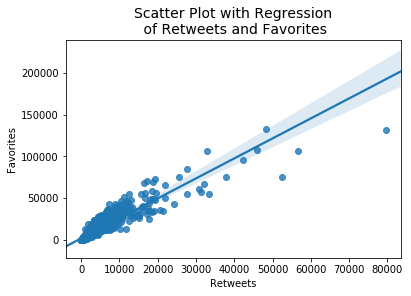

In [77]:
#twitter_archive_master.plot(x='retweet_count', y='favorite_count', kind='scatter')
sns.regplot(x='retweet_count', y='favorite_count', data=twitter_archive_master)
plt.xlabel('Retweets'), plt.ylabel('Favorites')
plt.title('Scatter Plot with Regression\n of Retweets and Favorites', fontsize=14);

* **Insight #1:** Tweets that are 'favorited' are also 'retweeted' with a high correlation of 0.91.

### Check Dog Data from Image Predictions for Insights

 * Create dataframe called 'twitter_most_rated_dogs' that contains the top 10 rated dogs by number of ratings.

In [78]:
twitter_archive_dogs = twitter_archive_master[twitter_archive_master.p1_dog]
most_rated = list((twitter_archive_dogs.p1.value_counts()).head(10).index)

In [79]:
most_rated

['golden_retriever',
 'Labrador_retriever',
 'Pembroke',
 'Chihuahua',
 'pug',
 'toy_poodle',
 'chow',
 'Samoyed',
 'Pomeranian',
 'malamute']

In [80]:
#https://stackoverflow.com/questions/38174155/group-dataframe-and-get-sum-and-count/38174164
#df.groupby('Company Name').agg({'Amount': ['sum','count']})
twitter_most_rated_dogs = twitter_archive_dogs[twitter_archive_dogs.p1.isin(most_rated)]
twitter_most_rated_dogs[['p1','rating']].groupby(['p1']).agg({'rating': ['count','mean', 'min', 'max']}).sort_values([('rating', 'mean')], ascending=False)

rating                         
                    count      mean  min       max
p1                                                
Pomeranian             41  1.253659  0.6  7.500000
Samoyed                42  1.169048  0.7  1.400000
golden_retriever      156  1.167607  0.5  3.428571
Pembroke               94  1.142553  0.4  1.400000
chow                   48  1.141667  0.7  1.300000
Labrador_retriever    106  1.119811  0.7  1.400000
toy_poodle             50  1.100000  0.7  1.300000
malamute               33  1.087879  0.8  1.300000
Chihuahua              90  1.049293  0.3  1.400000
pug                    62  1.024194  0.3  1.300000

 * Pomeranian is the highested rated dog, but appears to have a huge outlier rating of "7.5"

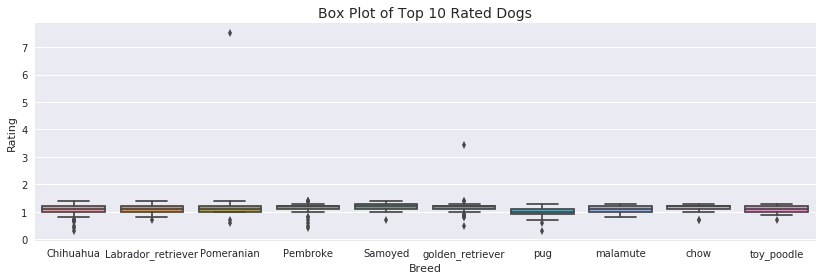

In [81]:
X = twitter_most_rated_dogs
sns.set(rc={'figure.figsize':(14,4)})
sns.boxplot(X.p1, X.rating, showfliers=True);
plt.xlabel('Breed'); plt.ylabel('Rating');
plt.title('Box Plot of Top 10 Rated Dogs', fontsize=14);

 * From the box plot, there are some big outliers in the dog ratings.
 * Let's remove the outliers and redraw the graph.

In [82]:
twitter_most_rated_dogs.rating.quantile(0.975), \
twitter_most_rated_dogs.rating.quantile(0.025)

(1.3, 0.7)

 * Create new dataframe within the quantiles shown above.

In [83]:
rating_bottom = twitter_most_rated_dogs.rating.quantile(0.025)
rating_top = twitter_most_rated_dogs.rating.quantile(0.975)
twitter_most_rated_dogs_clean = twitter_most_rated_dogs.copy()

twitter_most_rated_dogs_clean = \
    twitter_most_rated_dogs_clean[rating_bottom <= twitter_most_rated_dogs_clean.rating]
twitter_most_rated_dogs_clean = \
    twitter_most_rated_dogs_clean[twitter_most_rated_dogs_clean.rating <= rating_top]

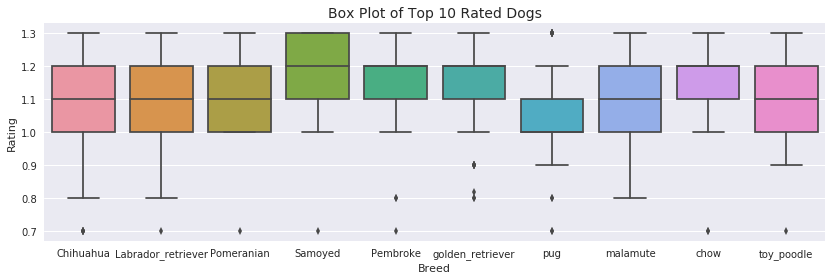

In [84]:
X = twitter_most_rated_dogs_clean
sns.set(rc={'figure.figsize':(14,4)})
sns.boxplot(X.p1, X.rating, showfliers=True);
plt.xlabel('Breed'); plt.ylabel('Rating');
plt.title('Box Plot of Top 10 Rated Dogs', fontsize=14);

In [85]:
twitter_most_rated_dogs_clean[['p1','rating']].groupby(['p1']).agg({'rating': ['count','mean', 'min', 'max']}).sort_values([('rating', 'mean')], ascending=False)

rating                    
                    count      mean  min  max
p1                                           
Samoyed                41  1.163415  0.7  1.3
golden_retriever      152  1.154067  0.8  1.3
Pembroke               87  1.152874  0.7  1.3
chow                   48  1.141667  0.7  1.3
Labrador_retriever    105  1.117143  0.7  1.3
Pomeranian             38  1.102632  0.7  1.3
toy_poodle             50  1.100000  0.7  1.3
malamute               33  1.087879  0.8  1.3
Chihuahua              85  1.072941  0.7  1.3
pug                    60  1.043333  0.7  1.3

* **Insight #2:** With the outliers removed, Pomeranian moves from #1 to #6 in the rankings.
* Samoyed, Golden Retriever, & Pembroke are the three highest rated dogs by mean.

### Tweet Analysis by Timeseries
 * Since we went through the trouble of identifying and converting timestamp to datetime, let's look at some trends over time (timeseries data).
 * We do not have follower count, so I will look at 'favorites' and 'retweets' as a way to gauge if followers is increasing or decreasing.
 * All analysis was done on my own; graphing of timeseries twitter data was inspired via the following article and improved upon using moving averages: https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-

In [86]:
twitter_archive_ts_analysis = twitter_archive_master.copy()

 * Let's look at metrics by year and month to see if anything stands out.

In [87]:
twitter_archive_ts_analysis['year'] = twitter_archive_master.timestamp.dt.year
twitter_archive_ts_analysis['month'] = twitter_archive_ts_analysis.timestamp.dt.month

In [88]:
twitter_archive_ts_analysis.groupby(['year']).mean()[['rating', 'favorite_count', 'retweet_count']]

,rating,favorite_count,retweet_count
year,,,
2015,0.991756,2492.277863,1077.706870
2016,1.264535,7775.503119,2754.537422
2017,1.240113,24085.347458,6023.692090


 * Average rating, favorite, and retweet when up from 2015-2016.
 * While average rating went down from 2015-2016, average favorite and retweet went way up.
 * This is most likely due to increased number of followers which we cannot verify because that data was not provided.

In [89]:
twitter_archive_ts_analysis.groupby(['year', 'month']).mean()[['rating', 'favorite_count', 'retweet_count']]

rating  favorite_count  retweet_count
year month                                         
2015 11     1.028814     1240.037288     541.620339
     12     0.961389     3518.419444    1517.000000
2016 1      1.006846     3990.674699    1519.614458
     2      1.012037     4308.157407    1609.111111
     3      1.038136     4638.567797    1650.754237
     4      1.037037     4703.851852    1613.203704
     5      1.087500     6101.107143    2183.303571
     6      1.020483     9520.607595    4136.886076
     7      3.087500     6980.761364    2482.545455
     8      1.093220    10307.440678    3671.864407
     9      1.144444    11435.476190    3687.285714
     10     1.267692    13294.169231    4274.276923
     11     1.203846    14896.269231    4922.961538
     12     1.235714    16213.777778    5400.351852
2017 1      1.227273    19743.121212    6443.575758
     2      1.218750    18737.265625    4438.031250
     3      1.234043    20573.404255    4886.212766
     4      1.222500    23107.300000    5844.275000
     5      1.276190    29039.166667    7570.023810
     6      1.250000    29126.159091    6586.090909
     7      1.263265    31801.183673    6868.530612
     8      1.300000    36643.000000    7683.500000

 * Let's remove outlier data and see some more results.

In [90]:
rating_bottom = twitter_archive_ts_analysis.rating.quantile(0.025)
rating_top = twitter_archive_ts_analysis.rating.quantile(0.975)

fav_bottom = twitter_archive_ts_analysis.favorite_count.quantile(0.025)
fav_top = twitter_archive_ts_analysis.favorite_count.quantile(0.975)

ret_bottom = twitter_archive_ts_analysis.retweet_count.quantile(0.025)
ret_top = twitter_archive_ts_analysis.retweet_count.quantile(0.975)

twitter_archive_ts_analysis_clean = twitter_archive_ts_analysis.copy()

In [91]:
twitter_archive_ts_analysis_clean = \
    twitter_archive_ts_analysis_clean[rating_bottom <= twitter_archive_ts_analysis_clean.rating]
twitter_archive_ts_analysis_clean = \
    twitter_archive_ts_analysis_clean[twitter_archive_ts_analysis_clean.rating <= rating_top]

twitter_archive_ts_analysis_clean = \
    twitter_archive_ts_analysis_clean[fav_bottom <= twitter_archive_ts_analysis_clean.favorite_count]
twitter_archive_ts_analysis_clean = \
    twitter_archive_ts_analysis_clean[twitter_archive_ts_analysis_clean.favorite_count <= fav_top]

twitter_archive_ts_analysis_clean = \
    twitter_archive_ts_analysis_clean[ret_bottom <= twitter_archive_ts_analysis_clean.retweet_count]
twitter_archive_ts_analysis_clean = \
    twitter_archive_ts_analysis_clean[twitter_archive_ts_analysis_clean.retweet_count <= ret_top]

In [92]:
twitter_archive_ts_analysis_clean.groupby(['year']).mean()[['rating', 'favorite_count', 'retweet_count']]

,rating,favorite_count,retweet_count
year,,,
2015,0.964505,2185.281081,897.841441
2016,1.076850,6799.279781,2221.434973
2017,1.230769,19889.819398,4470.397993


 * With outlier data removed, it's easier to see that there is a trend of increasing ratings year over year.
 * We can also see that favorites and retweets have gone up, meaning followers have probably gone up.

In [93]:
t_rating = pd.Series(data=twitter_archive_ts_analysis_clean['rating'].values, index=twitter_archive_ts_analysis_clean['timestamp'])
t_fav = pd.Series(data=twitter_archive_ts_analysis_clean['favorite_count'].values, index=twitter_archive_ts_analysis_clean['timestamp'])
t_ret = pd.Series(data=twitter_archive_ts_analysis_clean['retweet_count'].values, index=twitter_archive_ts_analysis_clean['timestamp'])

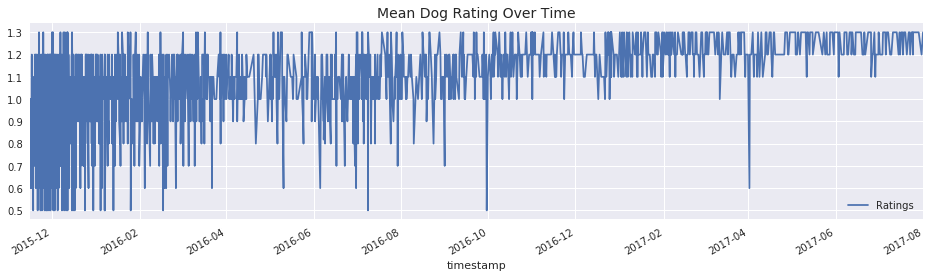

In [94]:
t_rating.plot(figsize=(16,4), label="Ratings", legend=True)
plt.title('Mean Dog Rating Over Time', fontsize=14);

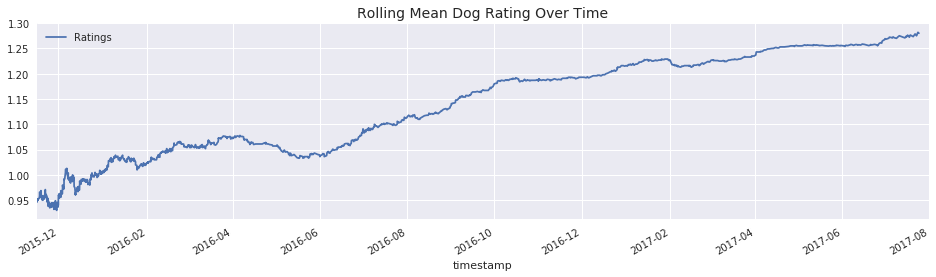

In [95]:
t_rating_roll = pd.Series(data=twitter_archive_ts_analysis_clean['rating'].rolling(100, min_periods=10).mean().values, index=twitter_archive_ts_analysis_clean['timestamp'])
t_rating_roll.plot(figsize=(16,4), label="Ratings", legend=True)
plt.title('Rolling Mean Dog Rating Over Time', fontsize=14);

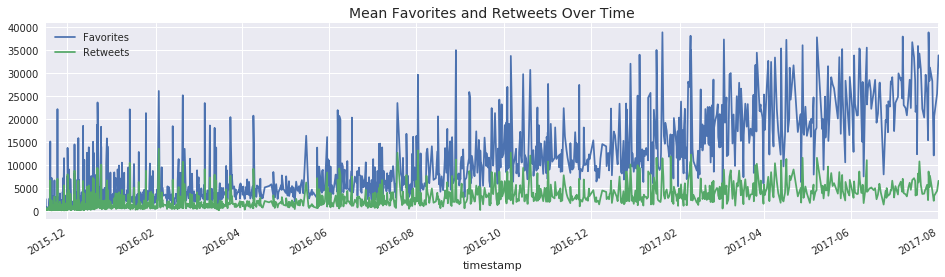

In [96]:
t_fav.plot(figsize=(16,4), label="Favorites", legend=True)
t_ret.plot(figsize=(16,4), label="Retweets", legend=True)
plt.title('Mean Favorites and Retweets Over Time', fontsize=14);

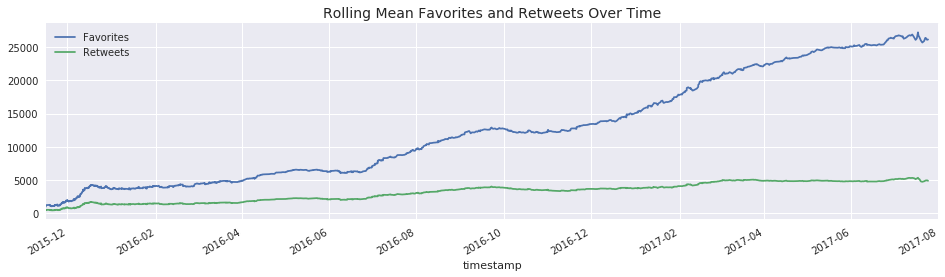

In [97]:
t_fav_roll = pd.Series(data=twitter_archive_ts_analysis_clean['favorite_count'].rolling(100, min_periods=10).mean().values, index=twitter_archive_ts_analysis_clean['timestamp'])
t_ret_roll = pd.Series(data=twitter_archive_ts_analysis_clean['retweet_count'].rolling(100, min_periods=10).mean().values, index=twitter_archive_ts_analysis_clean['timestamp'])
t_fav_roll.plot(figsize=(16,4), label="Favorites", legend=True)
t_ret_roll.plot(figsize=(16,4), label="Retweets", legend=True)
plt.title('Rolling Mean Favorites and Retweets Over Time', fontsize=14);

* **Insight #3:** With the outliers removed, it's very likely that the follower counts of 'WeRateDogs' increased significantly from 2015-2017 due to the greater number of favorites and retweets.